<a id="top"></a>
# London Free Transport
---

In this analysis, we looked in more detail at some of the answers that were given during a 2020 survey conducted to explore the views of young Londoners (aged 16-18) regarding the suspension of free travel for under-18s. 

An overwhelming majority (>95%) disapproved of the new plans, while a small percentage of young people (~2%) appproved of the plans. A small percentage (~2%) were also unsure.

Due to the high class imbalance, we performed a mixture of random oversampling of the minority class and random undersampling of the majority class. We then trained various models to see if we could predict a young persons decision on whether they approved or disapproved of the decision to cut free transport. 

None of the models trained were particularly accurate at prediciting which people approved of the decision, although our best model was the XGBoost model which managed to achieve the highest macro f1 score of 0.61.

Finally, we saved this model and tried to predict the decisions of the young people who had responded with 'Don't Know' when asked whether they approved or disapproved of the decison to cut free london transport.

Due to the sub optimal performace of the model, we cannot draw too many reliable conclusions from the predictions used with this model, however, it was interesting to see that the model predicted that XX out of XX young people who responded with dont know, were likely to vote approve whereas XX out of XX were likely to vote disapprove. 

Again while these results must be approached with caution due to the models poor performance, it would seem to suggest that young people who voted don't know were on average more likely to approve the decision as opposed to the whole sample.

## Contents
---

**1.  [Summary of Findings](#summary_of_findings)** <br>
**2.  [Statistical Summary of Models](#statistical_summary)** <br>
**3.  [About the Data](#about_the_data)** <br>
**4.  [Data Reading & Checking](#data_checking)** <br>
**5.  [Data Cleaning](#data_cleaning)** <br>
**6.  [EDA](#eda)** <br>
**7.  [EDA Summary](#eda_summary)** <br>
**8.  [Data Preprocessing](#data_preprocessing)** <br>
**9.  [Model Building](#model_building)** <br>
**10.  [Model Evaluation](#model_evaluation)** <br>
**11.  [Conclusion](#conclusion)** <br>
**12.  [Future Recommendations](#future_recommendations)** <br>

<a id="summary_of_findings"></a>
## 1. Summary of Findings
---

In [ ]:
# Summary of findings

<a id="statistical_summary"></a>
## 2. Statistical Summary of Models
---

None of the models we trained performed particulalry well in predicting whether a person would approve or disapprove of the decision to end free transport. This may be due to a few reasons. For example, there may not have been a strong enough link between the features we had in the data and participants' opinion on whether or not they approved of the decision. It may also be that our sample size was too small. At just over 2000 instances, our models may not have had enough data available to identify patterns. Increasing the amount of data and/or using more complex models, such as neural networks, may yield more accurate predictions.

Below is a statistical summary of the models we trained during the analysis.

Model | Precision | Recall | Macro_f1
 :- | :-: | :-: | :-: 
SVC | 0.14 | 0.1 | 0.55
Naive Bayes | 0.1 | **0.5** | 0.555
Decision Tree | 0.1 | 0.3 | 0.555
Random Forest | **0.19** | 0.3 | 0.604
Logistic Regression | 0.09 | 0.4 | 0.546
Ridge Classifier | 0.07 | **0.5** | 0.523
Bagging Classifier | 0.12 | 0.2 | 0.56
XGBoost | 0.18 | 0.4 | **0.611**

- **Random Forest** scored the best for precision  
- **Naive Bayes** and **Ridge Classifier** scored the best for recall, although the precision was very poor  
- **XGBoost** was the most balanced model and achieved the best macro f1 score

<a id="about_the_data"></a>
## 3. About the Data
---

Following proposals to end free transport for young people in London, a survey was conducted to understand how this may impact them and their future decisions.

Over 2000 young Londoners, aged 16 to 18, participated in the survey in which data was collected over the course of five consecutive days in 2020. 

The data includes general demographic data as well as more specific data such as transport methods to school/college, mental health, safety, impact on recreational activities and whether they approve or disapprove of the decision to end free transport.

*For access to the source data, please visit - https://data.london.gov.uk/dataset/free-travel-means-everything-to-me*

<a id="data_checking"></a>
## 4. Data Reading & Checking

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set DataFrame options
pd.set_option('display.max_columns', 150)

In [2]:
# Read data
df = pd.read_csv('data/transport_data.csv')

In [3]:
# Check data
df.head()

,What is your gender?,Other,How old are you?,Do you live in London?,How would you describe your ethnicity?,Other.1,Do you consider yourself to have a disability?,Are you a care experienced person?,Did you hear that the government is planning to cut free travel for under-18s in London?,Do you approve or disapprove the decision to cut free travel for under-18s in London?,How important is free transport in London for you?,How many buses / tubes / trams do you currently take to get to school or college?,How do you get to school or college?,Other.2,"If you have to pay for transport, will it change how you get to school or college?","If you have to pay for transport, how are you planning to get to school or college?",Other.3,"If you lose free travel, would this change the college or school you are considering attending?","Please describe what free transport means to you in a word, or words?","“If I lose free travel, I won’t travel out of my area as much unless I have to”","“If I lose free travel, I am worried getting to school/around London is less safe”","“If I lose free travel, I will cycle instead to the places I want to go”","“If I lose free travel, I can still afford to go to the places I want to go to”","“If I lose free travel, I am worried my parents will struggle to make ends meet”","“If I lose free travel, my mental health with suffer”",Museums,Art galleries,Shopping centres,Parks and green spaces,Areas outside your local borough or area,Sports clubs,Friends and family,"Where else would you visit less than you do now, if you had to pay for travel?"
0,Male,NaN,16,Yes,White British,NaN,No,Yes,No,Dissaprove,5,More than three,Train,NaN,Yes,NaN,"Car, which will mean my brother cannot get to ...",Yes,It means I can go around stress free and knowi...,4,2,3,2,3,4,1,1,3,4,2,2,3,I would visit my dentist less
1,Male,NaN,16,Yes,Any other White background,NaN,No,No,Yes,Dissaprove,5,One,Cycle,NaN,Yes,Cycle,NaN,Not sure,Financial freedom to get to wherever I need in...,4,4,5,1,2,4,1,1,4,5,1,4,4,Zero waste shops
2,Female,NaN,17,Yes,Mixed - White and Black African,NaN,No,No,Yes,Dissaprove,5,One,Bus,NaN,Yes,Walk,NaN,Yes,Opportunity,5,5,1,1,5,5,1,1,2,4,1,1,2,Youth clubs which is bad because it’s where I ...
3,Female,NaN,16,Yes,Any other White background,NaN,No,No,Yes,Dissaprove,5,Two,Train,NaN,Yes,Train,NaN,Not sure,It helps my family save money as we are financ...,3,4,1,2,3,4,3,3,4,4,2,3,4,Central london
4,Female,NaN,18,Yes,Black or Black British - Black African,NaN,No,No,Yes,Don't know,4,Two,Bus,NaN,No,NaN,NaN,No,Free transport to me is freedom to go where I ...,1,1,1,5,2,1,3,3,5,5,5,3,5,Is probably visit places as much as I do now b...


In [4]:
# View shape of data
df.shape

(2236, 33)

In [5]:
# Check types of data
df.dtypes

What is your gender?                                                                                object
Other                                                                                              float64
How old are you?                                                                                     int64
Do you live in London?                                                                              object
How would you describe your ethnicity?                                                              object
Other.1                                                                                             object
Do you consider yourself to have a disability?                                                      object
Are you a care experienced person?                                                                  object
Did you hear that the government is planning to cut free travel for under-18s in London?            object
Do you approve or disapprove the deci

In [6]:
# Look at list of columns in data
df.columns

Index(['What is your gender?', 'Other', 'How old are you?',
       'Do you live in London?', 'How would you describe your ethnicity?',
       'Other.1', 'Do you consider yourself to have a disability?',
       'Are you a care experienced person?',
       'Did you hear that the government is planning to cut free travel for under-18s in London?',
       'Do you approve or disapprove the decision to cut free travel for under-18s in London?',
       'How important is free transport in London for you?',
       'How many buses / tubes / trams do you currently take to get to school or college?',
       'How do you get to school or college?', 'Other.2',
       'If you have to pay for transport, will it change how you get to school or college?',
       'If you have to pay for transport, how are you planning to get to school or college?',
       'Other.3',
       'If you lose free travel, would this change the college or school you are considering attending?',
       'Please describe what free t

We will use column 9 - whether the young person approves or disapproves of the decison to cut free travel for under-18s in London - as the target variable. Let's look what answers were given.

In [7]:
# Look at target column
df.iloc[:, 9].unique()

array(['Dissaprove', "Don't know", 'Approve'], dtype=object)

In [9]:
# Fix spelling of Dissaprove
df.loc[df.iloc[:, 9] == "Dissaprove", df.columns[9]] = "Disapprove"

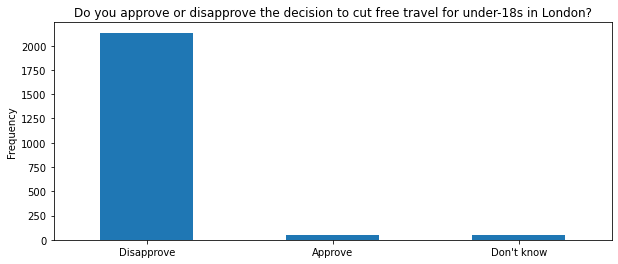

In [10]:
# Plot class distribution
labels = ["Disapprove", "Approve", "Don't know"]
classes = df.iloc[:, 9].value_counts()
plt.figure(figsize=(10,4))
classes.plot(kind='bar', rot=0)
plt.title(f"{df.columns[9]}")
plt.xticks(range(3), labels)
plt.ylabel("Frequency");

In [11]:
# Percentage of each answer
total = df.shape[0]
disapprove = df[df.iloc[:, 9] == "Disapprove"]
approve = df[df.iloc[:, 9] == "Approve"]
dont_know = df[df.iloc[:, 9] == "Don't know"]

print(f"Disapprove:\t {round(len(disapprove)/total*100, 2)}%")
print(f"Approve:\t {round(len(approve)/total*100,2)}%")
print(f"Don't Know:\t {round(len(dont_know)/total*100, 2)}%")

Disapprove:	 95.44%
Approve:	 2.28%
Don't Know:	 2.28%


We can see that a large majority of young people who participated in the survey (>95%) Disapproved of the decison to cut free travel for under-18s in London.

Because the column names are lengthy, we will add a numerical prefix to make it easier to reference them.

In [12]:
# Add manual index to columns to make them easier to reference
df.columns = [f'{i}_{x}' for i, x in enumerate(df.columns, 1)]

In [13]:
# Check for duplicate data
df.duplicated().sum()

0

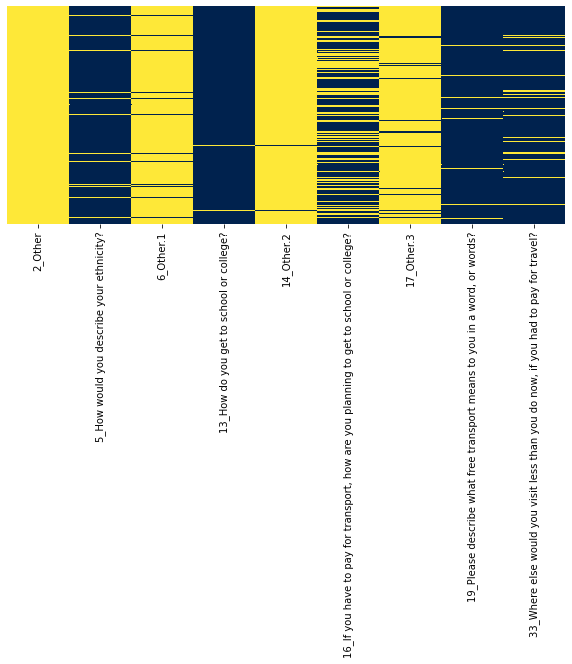

In [14]:
# Visualise missing data for features which have missing data
plt.figure(figsize=(10,4))
sns.heatmap(df.loc[:, df.isnull().any()].isnull(), yticklabels=False, cbar=False, cmap='cividis');

In [15]:
# Look at percentage of nulls
round(df.loc[:, df.isnull().any()].isnull().sum()/df.shape[0]*100, 2)
# or
# round(df.loc[:, df.isnull().any()].isnull().mean()*100,2)

2_Other                                                                                   100.00
5_How would you describe your ethnicity?                                                    4.83
6_Other.1                                                                                  95.17
13_How do you get to school or college?                                                     1.21
14_Other.2                                                                                 98.79
16_If you have to pay for transport, how are you planning to get to school or college?     35.60
17_Other.3                                                                                 91.82
19_Please describe what free transport means to you in a word, or words?                    4.20
33_Where else would you visit less than you do now, if you had to pay for travel?           8.99
dtype: float64

From the features that contain missing values, we can see that four of the features (2, 6, 14, 17) contain a very high amount of missing data - sometimes even 100% in the case of feature 2.

<a id="data_cleaning"></a>
## 5. Data Cleaning

### Ethnicity

In [16]:
# Look at all unique values ethnicity
df.iloc[:, 4].unique()

array(['White British', 'Any other White background',
       'Mixed - White and Black African',
       'Black or Black British - Black African',
       'Asian or Asian British – Indian', nan, 'Prefer Not to Say',
       'Any other Mixed background', 'Mixed - White and Black Caribbean',
       'Black or Black British – Black Caribbean',
       'Asian or Asian British – Bangladeshi', 'Mixed - White and Asian',
       'Asian or Asian British - Any other Asian background',
       'Asian or Asian British – Pakistani',
       'Black or Black British - Any other Black background', 'Chinese'],
      dtype=object)

In [17]:
# Look at some of the answers that have been given as 'Other' for ethnicity
df[df.iloc[:, 5].notnull()].iloc[:, 5]

10                   Caribbean
16                     Kurdish
27                  Bulgarian 
52      Latino/South American 
70                 Sri Lankan 
                 ...          
2175                    Latino
2190           Latin American 
2200                Brazilian 
2221                   Turkish
2222                Sri lankan
Name: 6_Other.1, Length: 108, dtype: object

In [18]:
# Count of 'Other' ethnicities
df.iloc[:, 5].value_counts()

Arab                          8
Latino                        6
Turkish Cypriot               3
Kurdish                       3
Turkish                       3
                             ..
Berber                        1
Filipino                      1
Mixed African                 1
Iraqi                         1
South american and italian    1
Name: 6_Other.1, Length: 75, dtype: int64

As we can see, the majority of 'Other' ethnicities only have small counts for each one so we will fill all those with just 'Other'.

In [19]:
# Fill all null values in ethnicity with 'Other'
df.iloc[:, 4].fillna('Other', inplace=True)

### Getting to School/College

In [20]:
# Look at all unique values for how people get to school/college
df.iloc[:, 12].unique()

array(['Train', 'Cycle', 'Bus', 'Tube', 'Walk', nan], dtype=object)

In [21]:
# Check if there are any intances where both features (13 and 14) have been completed
any(df.iloc[:, 12].notnull() & df.iloc[:, 13].notnull())

False

In [22]:
# View answers given as for 'Other' (feature 14)
df[df.iloc[:, 13].notnull()].iloc[:, 13]

42                            Car
94           train, tube and walk
120                           Car
175                         Coach
220              Walk, bus + tube
495                  bus and tube
672                        Drive 
703                           Car
795                Bus and train 
896                           Car
980                Train and bus 
998                           car
1047                         Tram
1212                Bus and Train
1225                 Bus and walk
1426                Bus and train
1434         Bus , train and walk
1468                          Car
1720                          Car
1770                          Car
1860           College transport 
1871                        Tram 
1888               Bus and trains
2024             Several of these
2103    Local Authority transport
2171           Both train and bus
2217                        Coach
Name: 14_Other.2, dtype: object

Here we can see that 'Car' has been given as an answer which wasn't available in the original question. Also, it seems some people take multiple forms of transport to get to school/college. To capture all of this data, we will create three new categories within feature 13 (Multiple, Car, Other).

In [23]:
# Make a list of all the instances which have null data in feature 13
null_q13 = df[df.iloc[:,12].isnull()].index.tolist()

In [24]:
# Use 'Other' data from feature 14 to impute missing values in feature 13
for index in null_q13:
    if 'and' in df.iloc[index, 13].lower() or 'several' in df.iloc[index, 13].lower() or '+' in df.iloc[index, 13].lower():
        df.iloc[index, 12] = 'Multiple'
    elif 'car' in df.iloc[index, 13].lower() or 'drive' in df.iloc[index, 13].lower():
        df.iloc[index, 12] = 'Car'
    else:
        df.iloc[index, 12] = 'Other'

In [25]:
# View imputed data
df.iloc[null_q13, :].iloc[:,12:14]

,13_How do you get to school or college?,14_Other.2
42,Car,Car
94,Multiple,"train, tube and walk"
120,Car,Car
175,Other,Coach
220,Multiple,"Walk, bus + tube"
495,Multiple,bus and tube
672,Car,Drive
703,Car,Car
795,Multiple,Bus and train
896,Car,Car


That looks much better. We can see that we have successfully extracted the data from feature 14 and imputed missing values in feature 13 with that data.

### Transport if Having to Pay

In [27]:
# View unique values for how people plan to get to school/college if they have to pay
df.iloc[:, 15].unique()

array([nan, 'Cycle', 'Walk', 'Train', 'Bus', 'Tube'], dtype=object)

In [28]:
# Counts of all answer to feature 16 including null values
df.iloc[:, 15].value_counts(dropna=False)

NaN      796
Walk     633
Bus      375
Train    198
Cycle    196
Tube      38
Name: 16_If you have to pay for transport, how are you planning to get to school or college?, dtype: int64

Here we can see that the majority of people did not answer this question.

In [29]:
# View count of data in feature 17
len(df[df.iloc[:, 16].notnull()].iloc[:, 16])

183

However, it seems that 183 people did provide an answer as 'Other' (feature 17).

In [30]:
# Make a list of all the instances which have null data in feature 16
null_q16 = df[df.iloc[:,15].isnull()].index.tolist()

In [31]:
# Check if there are any intances where both features (16 and 17) have been completed
any(df.iloc[:, 15].notnull() & df.iloc[:, 16].notnull())

False

In [32]:
# View some of the data given in feature 17
df[df.iloc[:,16].notnull()].iloc[:, 16].values[:50]

array(['Car, which will mean my brother cannot get to school in time if I do',
       'Get driven/take the school bus', 'Car', 'No school',
       'Possible buying a car ', 'Cab', 'car', 'i don’t know ', 'Car',
       'Not going too', 'car', 'Car',
       "I don't know, don't have enough money, dont kno e how to ride a bike and walking will take an hour ",
       "I'd have to get driven by my parents which would mess up our timing in the mornings and they would be late for work",
       'car', 'Car', 'Taxi', 'Car', 'Walk for 1 hour no thanks ?',
       'Driven by family if available or a cab', 'Skate',
       'I’m not going school ', 'car', 'Car or uber', 'Car', 'Car', 'Car',
       'Car', 'mix of walkin and public transport ', 'carpooling',
       'I don’t know yet ', 'Car ', 'Car', 'Skateboarding ',
       "I don't know still need to figure it out", 'Mum dropping me off',
       'Car', 'Taxi', 'Car', 'Drive', 'Drive', 'Car', 'Taxi', 'Car',
       'Skate', 'Car', 'Scooter',
       'Wi

Again, we can see a lot of people answering 'Car' which was not available as an answer in the original question. We can also see some people mention a 'Taxi' as well as an assortment of other answers. Because 'Car' and 'Taxi' seem to be quite common answer, we will make a category for them in feature 16.

In [33]:
# Use data from feature 17 to impute some of the missing values in feature 16
for index in null_q16:
    if pd.isnull(df.iloc[index, 16]):
        continue
    if 'car' in df.iloc[index, 16].lower() or 'driv' in df.iloc[index, 16].lower() or 'lift' in df.iloc[index, 16].lower():
        df.iloc[index, 15] = 'Car'
    elif 'taxi' in df.iloc[index, 16].lower() or 'cab' in df.iloc[index, 16].lower():
        df.iloc[index, 15] = 'Taxi'

In [34]:
# View some of the imputed data
df.iloc[null_q16, 15:17].dropna().head(15)

,"16_If you have to pay for transport, how are you planning to get to school or college?",17_Other.3
0,Car,"Car, which will mean my brother cannot get to ..."
9,Car,Get driven/take the school bus
22,Car,Car
35,Car,Possible buying a car
55,Taxi,Cab
90,Car,car
117,Car,Car
143,Car,car
144,Car,Car
188,Car,I'd have to get driven by my parents which wou...


While it is not perfect, it looks like we were able to capture some of the data from feature 17 to populate the missing data in feature 16.

### What Free Transport Means for You

In [35]:
# Look at some of the answers that people have given for what free transport means to them 
df.iloc[:, 18].values[:15]

array(['It means I can go around stress free and knowing my family can have savings to eat and drink',
       'Financial freedom to get to wherever I need in London.',
       'Opportunity',
       'It helps my family save money as we are financially struggling',
       'Free transport to me is freedom to go where I need to go',
       'Vital', 'A lifeline', 'freedom of movement',
       'It allows us to explore, to not have to worry about the many other things that cost money in this economy. Free travel helps me so much, more than words can ever say',
       'free travel allows me to get to school cheaper as well as giving me the opportunity to be more independent as I am not asking my parents to drive me or give me money',
       "It's easier for me cause I can use the money that I don't use in the transport for an other thing like school's meals ir something like that",
       'Important', 'Essential', 'hhh',
       'It helps me get around a lot of places including education centres

Let's create a wordcloud to focus in on some of the key words being used when answering the question of what free transport means to young Londoners.


 Question: Please describe what free transport means to you in a word, or words?



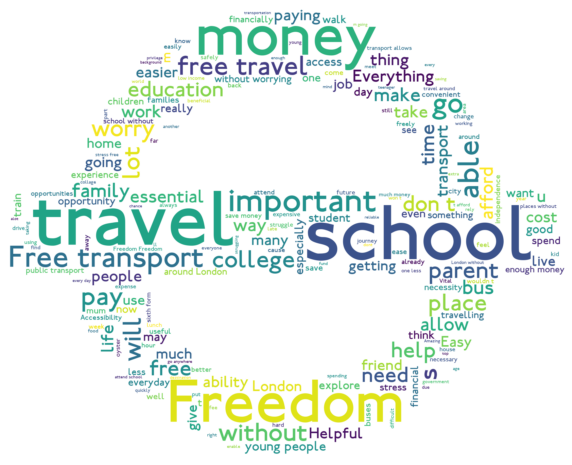

In [36]:
# Create wordcloud for feature 19
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Set up text
q19_answers = df[df.iloc[:,18].notnull()].iloc[:,18]
text = " ".join(word for word in q19_answers)

# Generate a word cloud image
stop_words = ["mean", "means"] + list(STOPWORDS)
font_path = "fonts/London_Underground_Normal.ttf"
mask = np.array(Image.open('images/underground.png'))
wordcloud = WordCloud(stopwords=stop_words, mask=mask, font_path=font_path, random_state=2, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image
plt.figure(figsize=[10,10])
print(f"\n\033[1m Question: {df.columns[18].split('_')[1]}\n")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

When asked what free treansport means to them, it seems like some of the most common answers include words such as **travel**, **freedom**, **school** and **money**.

Now, let's remove any features that have missing values before we move on to the EDA phase.

In [37]:
# Remove columns with null values
df = df.dropna(axis=1)

In [38]:
# Reset manual index
df.columns = [f"{i}_{x.split('_')[1]}" for i, x in enumerate(df.columns, 1)]

In [39]:
# Check nulls for each column
df.isnull().sum()

1_What is your gender?                                                                                0
2_How old are you?                                                                                    0
3_Do you live in London?                                                                              0
4_How would you describe your ethnicity?                                                              0
5_Do you consider yourself to have a disability?                                                      0
6_Are you a care experienced person?                                                                  0
7_Did you hear that the government is planning to cut free travel for under-18s in London?            0
8_Do you approve or disapprove the decision to cut free travel for under-18s in London?               0
9_How important is free transport in London for you?                                                  0
10_How many buses / tubes / trams do you currently take to get t

In [40]:
# Look at data
df.head()

,1_What is your gender?,2_How old are you?,3_Do you live in London?,4_How would you describe your ethnicity?,5_Do you consider yourself to have a disability?,6_Are you a care experienced person?,7_Did you hear that the government is planning to cut free travel for under-18s in London?,8_Do you approve or disapprove the decision to cut free travel for under-18s in London?,9_How important is free transport in London for you?,10_How many buses / tubes / trams do you currently take to get to school or college?,11_How do you get to school or college?,"12_If you have to pay for transport, will it change how you get to school or college?","13_If you lose free travel, would this change the college or school you are considering attending?","14_“If I lose free travel, I won’t travel out of my area as much unless I have to”","15_“If I lose free travel, I am worried getting to school/around London is less safe”","16_“If I lose free travel, I will cycle instead to the places I want to go”","17_“If I lose free travel, I can still afford to go to the places I want to go to”","18_“If I lose free travel, I am worried my parents will struggle to make ends meet”","19_“If I lose free travel, my mental health with suffer”",20_Museums,21_Art galleries,22_Shopping centres,23_Parks and green spaces,24_Areas outside your local borough or area,25_Sports clubs,26_Friends and family
0,Male,16,Yes,White British,No,Yes,No,Disapprove,5,More than three,Train,Yes,Yes,4,2,3,2,3,4,1,1,3,4,2,2,3
1,Male,16,Yes,Any other White background,No,No,Yes,Disapprove,5,One,Cycle,Yes,Not sure,4,4,5,1,2,4,1,1,4,5,1,4,4
2,Female,17,Yes,Mixed - White and Black African,No,No,Yes,Disapprove,5,One,Bus,Yes,Yes,5,5,1,1,5,5,1,1,2,4,1,1,2
3,Female,16,Yes,Any other White background,No,No,Yes,Disapprove,5,Two,Train,Yes,Not sure,3,4,1,2,3,4,3,3,4,4,2,3,4
4,Female,18,Yes,Black or Black British - Black African,No,No,Yes,Don't know,4,Two,Bus,No,No,1,1,1,5,2,1,3,3,5,5,5,3,5


<a id="eda"></a>
## 6. EDA

 Question: What is your gender?


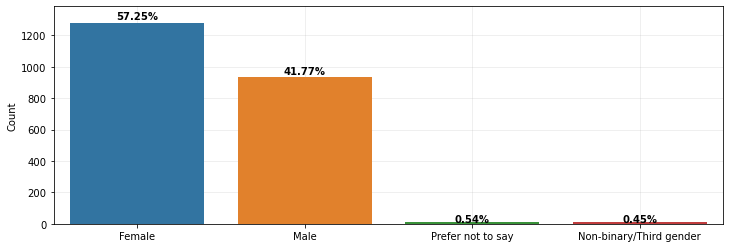

 Question: How old are you?


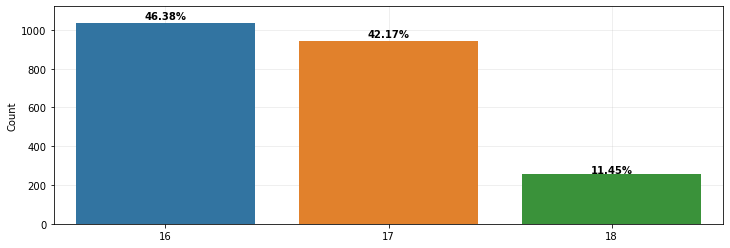

 Question: Do you live in London?


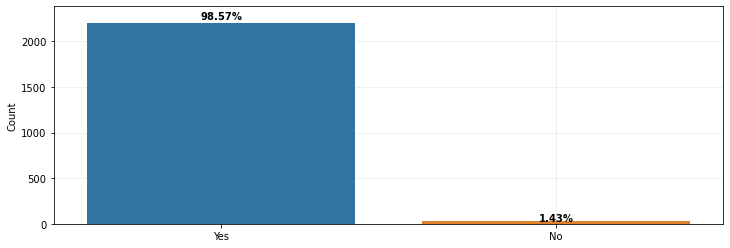

 Question: How would you describe your ethnicity?


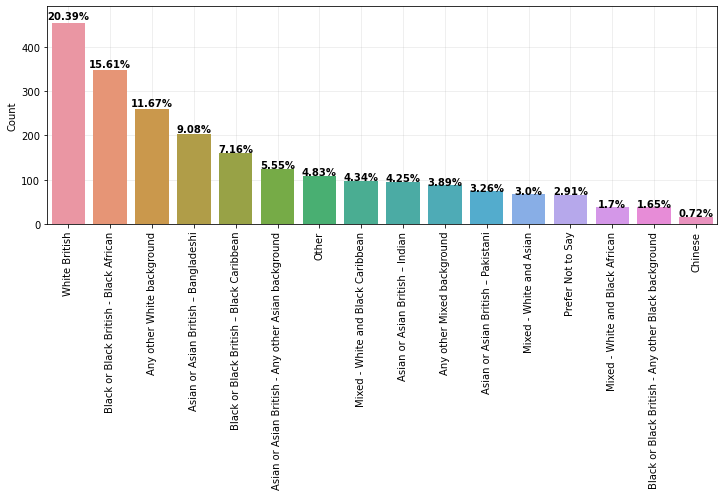

 Question: Do you consider yourself to have a disability?


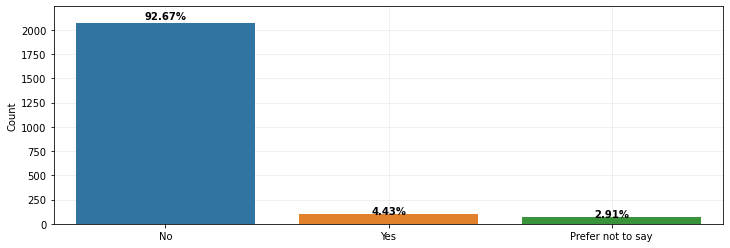

 Question: Are you a care experienced person?


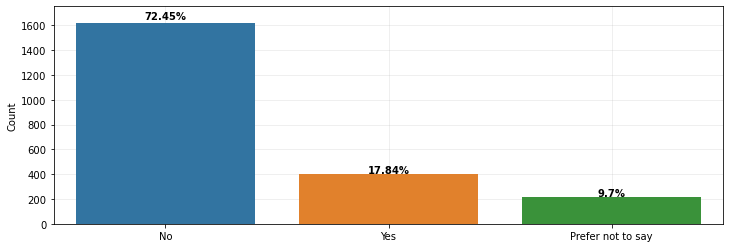

In [41]:
# View plots for demographic features
total = df.shape[0]
for feature in df.columns[:6]:
    feature_num = df[feature].value_counts()
    print(f"\033[1m Question: {feature.split('_')[1]}")
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)  
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round((height/total)*100,2)}%', (x+width/2, y+height*1.02), ha='center', weight='bold')
    if 'ethnicity' in feature:
        plt.xticks(rotation=90)
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.03)
    plt.ylabel('Count')
    plt.grid(alpha=.25)
    plt.show()

Here we can visualise some of the demographics of the people who participated in the survey. We can see that there are slightly more female participants (**57.25%**) than male (**41.77%**). We can also see that the majority of participants:

- Are aged either 16 or 17 years old (**46.38%** and **42.17%** respectively)
- Reside in London (**98.57%**)
- Do not consider themselves to have a diability (**92.67%**)
- Are not a care experienced person (**72.45**)

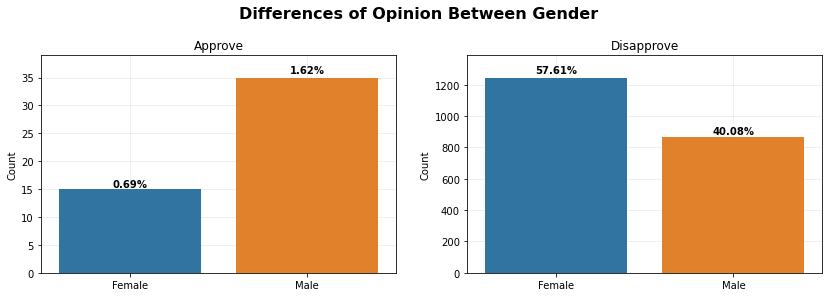

In [88]:
# Difference of opinion between genders
gender_decision_a = df[df.iloc[:, 7] == 'Approve'].iloc[:, 0].value_counts()[:2].sort_index()
gender_decision_d = df[df.iloc[:, 7] == 'Disapprove'].iloc[:, 0].value_counts()[:2]

# Set up figure
fig, ax = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Differences of Opinion Between Gender', weight='bold', fontsize=16, y=1.05)

# Plots
sns.barplot(x=gender_decision_a.index, y=gender_decision_a, zorder=2, ax=ax[0])  
sns.barplot(x=gender_decision_d.index, y=gender_decision_d, zorder=2, ax=ax[1]) 

# Annotations
for i in range(2):
    for p in ax[i].patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax[i].annotate(f'{round((height/sum(gender_decision_a+gender_decision_d))*100,2)}%', 
        (x+width/2, y+height*1.02), ha='center', weight='bold')

        ymin, ymax = ax[i].get_ylim()
        ax[i].set_ylim(ymin, ymax*1.03)
        
        ax[i].set_ylabel('Count')
        ax[i].grid(alpha=.25)

ax[0].set_title('Approve')
ax[1].set_title('Disapprove')
plt.show()

Interestingly, despite females outnumbering males overall, males were more than twice as likely to approve of the decision to cut free transport to under 18's in London.

This could be because, females tend to feel more vulnerable when travelling through london and thus free transport to them ensures their safety more that if they had to opt for another mehtod of transportation such as cycling or walking.

In [ ]:
# Compare safety for male and female

 Question: Did you hear that the government is planning to cut free travel for under-18s in London?


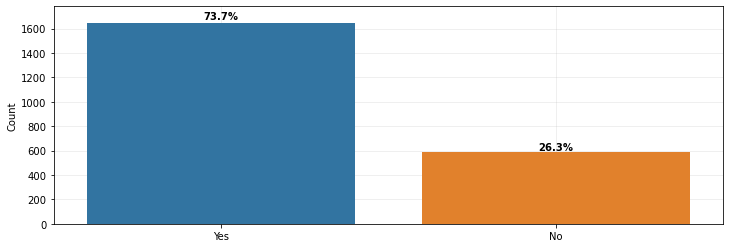

 Question: Do you approve or disapprove the decision to cut free travel for under-18s in London?


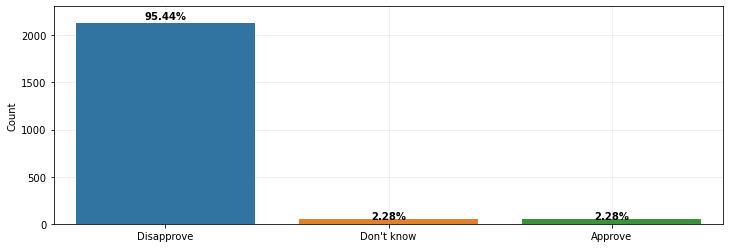

 Question: How important is free transport in London for you?


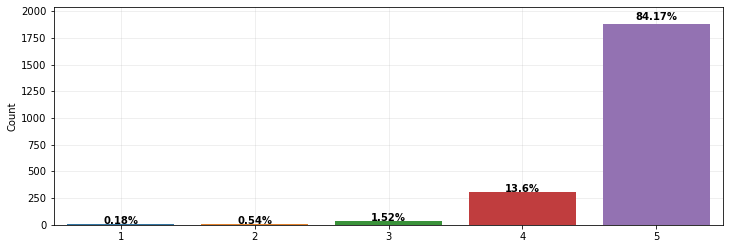

 Question: How many buses / tubes / trams do you currently take to get to school or college?


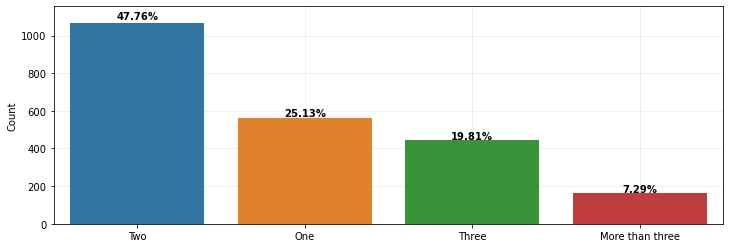

 Question: How do you get to school or college?


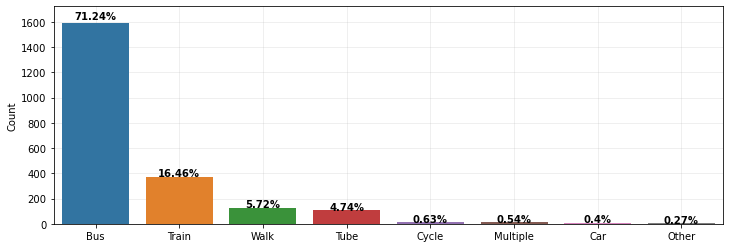

 Question: If you have to pay for transport, will it change how you get to school or college?


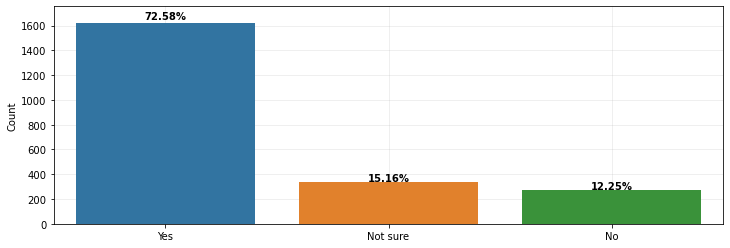

In [100]:
# View plots for more specific questions
for feature in df.columns[6:12]:
    feature_num = df[feature].value_counts()
    print(f"\033[1m Question: {feature.split('_')[1]}")
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)  
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round((height/total)*100,2)}%', (x+width/2, y+height*1.02), ha='center', weight='bold')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.03)
    plt.ylabel('Count')
    plt.grid(alpha=.25)
    plt.show()

Now let's have a look at how it would affect the activities that people choose to do.

In [101]:
# Create activities df
df_activities = pd.DataFrame()
for i in df.columns[19:]:
    series = df[i].value_counts().sort_index()
    col = i.split('_')[1]
    df_activities[col] = series

**1** - Would not go anymore  
**2** - Would go far less  
**3** - Not sure  
**4** - Would go a little less  
**5** - Would go the same amount

In [122]:
# Assign labels
activity_labels = [
    'Would not go anymore',  
    'Would go far less',  
    'Not sure',  
    'Would go a little less',  
    'Would go the same amount'
]

df_activities.index = activity_labels
df_activities

,Museums,Art galleries,Shopping centres,Parks and green spaces,Areas outside your local borough or area,Sports clubs,Friends and family
Would not go anymore,1103,1181,237,273,679,836,159
Would go far less,580,522,577,409,734,528,412
Not sure,346,347,646,563,404,481,641
Would go a little less,133,126,543,580,226,217,639
Would go the same amount,74,60,233,411,193,174,385


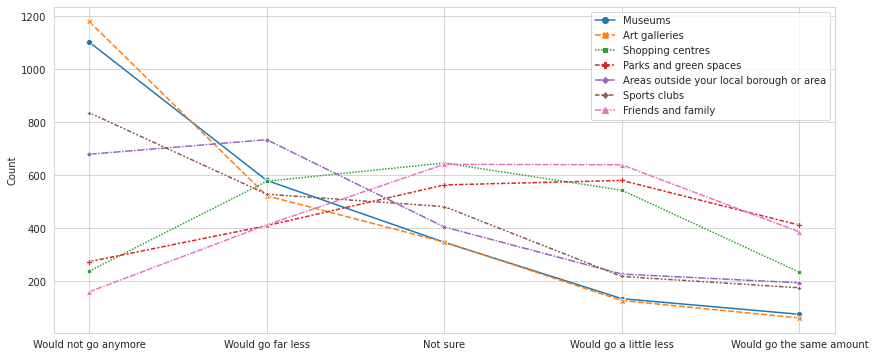

In [188]:
# Plot activities df
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
sns.lineplot(data=df_activities, markers=True)
plt.ylabel('Count');

From the graph, we can see that museums and art galleries would be most affected by plans to cut the free transport for under-18's in london. Parks/green spaces, shopping centres and friends/family would be least affected.

<a id="eda_summary"></a>
## 7. EDA Summary
---

From the EDA, we found that although the majority of pople who participated in the survey were female, it was males who predominantly approved of the decision to cut free travel for under-18's in London. Males were more than twice as likely to approve of the deciison than females. 

We also observed that cultural centers such as museums and art galleries would be affected the most by plans to cut free travel. This could be because young people don't value these activities as much as they do the other activities. It could also be because generally museums and art galleries tend to be closer to the city centre, whereas parks, shopping centres and friends/family may be located much closer and thus easier to get to without public transport. 

<a id="data_preprocessing"></a>
## 8. Data Preprocessing

In [125]:
# Remove all instances where the answer was 'Don't Know' for the target variable
df_pre = df[df.iloc[:, 7] != "Don't know"]

# Save copy for testing once we have selected the best model
df_dk = df[df.iloc[:, 7] == "Don't know"]

In [126]:
# Separate target variable and features
X = df_pre.drop(df.columns[7], axis=1)
y = df_pre.iloc[:, 7]

In [127]:
# Label encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Labels after encoding:

**1** - Disapprove  
**0** - Approve

In [128]:
# Perform One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
X = enc.fit_transform(X)

In [130]:
# Make custom scorer
custom_scorer = make_scorer(f1_score, average='macro')

In [131]:
# Store models and model scores
model_scores = {}
all_models = []

As we are dealing with a highly imbalanced dataset we will use the pipeline from the imblearn package. The pipeline from this package will help us to perform sampling on our training data only. To make it easier to test multiple models quickly, we will create a function that will split the data and apply our sampling before fitting the estimator. We will use grid search to find the best parameters which maximise the macro f1 score and then use our best estimator for predicting our test set. Finally, we will output the relevant evaluation metrics.

After playing around with different values for the sampling strategies for both the random oversampler and undersampler, I settled on a sampling strategy of 0.1 for oversampling and 0.5 for undersampling. This means that our minority class (Approve) is oversampled to a ratio of 10% of the majority class and then the majortiy class (Disapprove) is undersampled leaving the final ratio of minority to majority class at 50%.

In [177]:
# Function for evaluating models
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline as PipelineImb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Define function
def evaluate_model(name, model, params):
        
    # Split data into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Make pipeline for oversampling and undersampling
    imbpipe = PipelineImb([
        ('oversample', RandomOverSampler(sampling_strategy=0.1, random_state=42)),
        ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
        ('model', model)]
    )

    # Create cross validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Run grid search
    gs = GridSearchCV(estimator=imbpipe, param_grid=params, cv=skf, scoring=custom_scorer)

    # Fit gs
    gs.fit(X_train, y_train)

    # Best estimator
    print(gs.best_params_)
    best_pipe = gs.best_estimator_
    
    # Cross val scores for f1
    scores = cross_val_score(best_pipe, X_train, y_train, scoring=custom_scorer, cv=skf, n_jobs=-1)
    print("-"*80)
    print(f'{name}:')
    print(f'Average f1-Score for Training Data:\t {np.mean(scores):.3f}')
    
    # Make predictions (samplers are only applied during fit thus we can use the imblearn pipeline to predict)
    y_pred = best_pipe.predict(X_test)
    
    # Scores
    precision = round(precision_score(y_test, y_pred, pos_label=0),2)
    recall = recall_score(y_test, y_pred, pos_label=0)
    macro_f1 = round(f1_score(y_test, y_pred, average="macro"),3)
    model_scores[name] = (precision, recall, macro_f1)
    all_models.append((best_pipe[2], macro_f1))

    # Output
    print(f'\nPrecision Score for Test Data:\t\t {precision:.2f}')
    print(f'Recall Score for Test Data:\t\t {recall:.2f}')
    print(f'Macro Average f1-score on Test Data:\t {macro_f1:.3f}')
    print("-"*55,"\n")
    print(classification_report(y_test, y_pred))
    print("-"*55)
    
    # Plots
    fig, ax = plt.subplots(1, 3, figsize=(15,4))
    plot_confusion_matrix(best_pipe, X_test, y_test, colorbar=False, ax=ax[0])
    plot_roc_curve(best_pipe, X_test, y_test, pos_label=0, name=name, ax=ax[1])
    plot_precision_recall_curve(best_pipe, X_test, y_test, pos_label=0, name=name, ax=ax[2])
    ax[1].grid()
    ax[2].grid();

<a id="model_building"></a>
## 9. Model Building

In [133]:
# Models and evaluation metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBClassifier

For this analysis, we will use the following 8 models:

**- SVC**  
**- Naive Bayes**  
**- Decision Tree**  
**- Random Forest**  
**- Logistic Regression**  
**- Redge Classifier**  
**- Bagging Classifier**  
**- XGBoost**  

We will run through all of the models sequentially and then analyse the outputs at the end to see which model performs best.

In [150]:
# Set plot style
sns.set_style("white")

{'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'poly'}
--------------------------------------------------------------------------------
SVC:
Average f1-Score for Training Data:	 0.569

Precision Score for Test Data:		 0.14
Recall Score for Test Data:		 0.10
Macro Average f1-score on Test Data:	 0.550
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.98      0.99      0.98       427

    accuracy                           0.97       437
   macro avg       0.56      0.54      0.55       437
weighted avg       0.96      0.97      0.96       437

-------------------------------------------------------


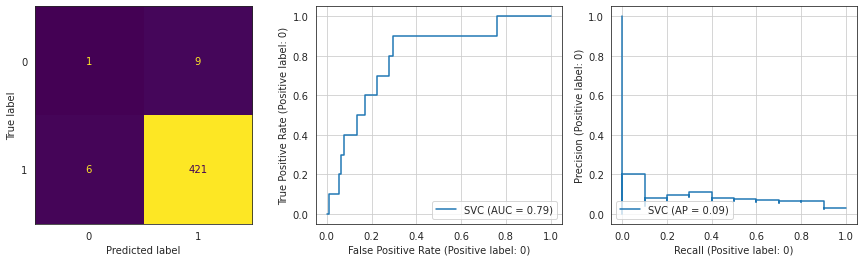

In [178]:
# SVC model
svc = SVC(random_state=42)
params_svc = {
    'model__C' : [10, 1, 0.1, 0.001],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}
evaluate_model("SVC", svc, params_svc)

{'model__alpha': 10}
--------------------------------------------------------------------------------
Naive Bayes:
Average f1-Score for Training Data:	 0.550

Precision Score for Test Data:		 0.10
Recall Score for Test Data:		 0.50
Macro Average f1-score on Test Data:	 0.555
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.10      0.50      0.17        10
           1       0.99      0.90      0.94       427

    accuracy                           0.89       437
   macro avg       0.54      0.70      0.55       437
weighted avg       0.97      0.89      0.92       437

-------------------------------------------------------


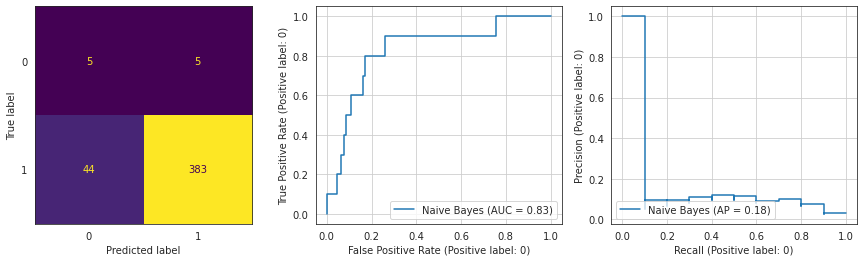

In [157]:
# Naive Bayes model
nb = BernoulliNB()
params_nb = {
    'model__alpha' : [0.1, 1, 10, 100],
}
evaluate_model("Naive Bayes", nb, params_nb)

{'model__max_depth': 6, 'model__min_samples_leaf': 1}
--------------------------------------------------------------------------------
Decision Tree:
Average f1-Score for Training Data:	 0.525

Precision Score for Test Data:		 0.10
Recall Score for Test Data:		 0.30
Macro Average f1-score on Test Data:	 0.555
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.10      0.30      0.15        10
           1       0.98      0.94      0.96       427

    accuracy                           0.92       437
   macro avg       0.54      0.62      0.55       437
weighted avg       0.96      0.92      0.94       437

-------------------------------------------------------


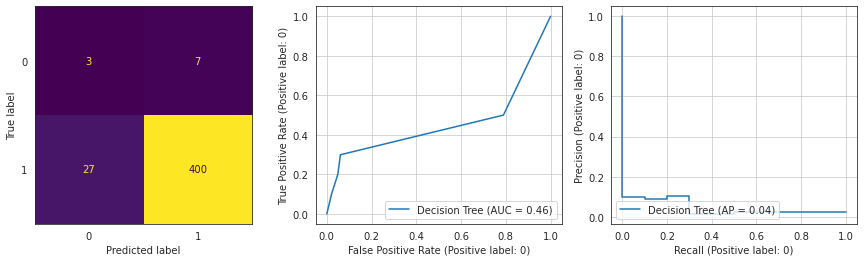

In [158]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
params_dt = {
    'model__max_depth': np.arange(3, 10),
    'model__min_samples_leaf' : np.arange(1, 10)
}
evaluate_model("Decision Tree", dt, params_dt)

{'model__max_depth': 4, 'model__min_samples_leaf': 2}
--------------------------------------------------------------------------------
Random Forest:
Average f1-Score for Training Data:	 0.599

Precision Score for Test Data:		 0.19
Recall Score for Test Data:		 0.30
Macro Average f1-score on Test Data:	 0.604
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.19      0.30      0.23        10
           1       0.98      0.97      0.98       427

    accuracy                           0.95       437
   macro avg       0.59      0.63      0.60       437
weighted avg       0.97      0.95      0.96       437

-------------------------------------------------------


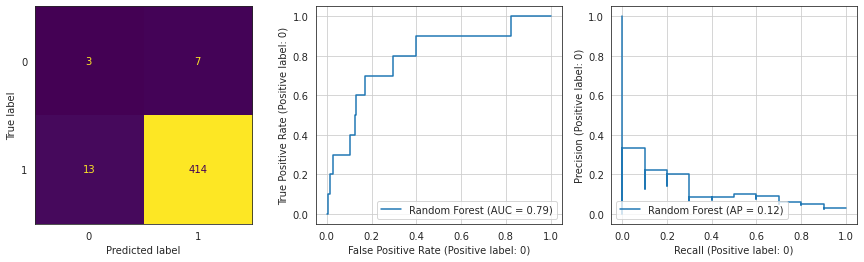

In [159]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'model__max_depth': np.arange(3, 10),
    'model__min_samples_leaf' : np.arange(1, 10)
}
evaluate_model("Random Forest", rf, params_rf)

{'model__C': 0.1, 'model__solver': 'newton-cg'}
--------------------------------------------------------------------------------
Logistic Regression:
Average f1-Score for Training Data:	 0.532

Precision Score for Test Data:		 0.09
Recall Score for Test Data:		 0.40
Macro Average f1-score on Test Data:	 0.546
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.09      0.40      0.15        10
           1       0.98      0.91      0.94       427

    accuracy                           0.89       437
   macro avg       0.54      0.65      0.55       437
weighted avg       0.96      0.89      0.93       437

-------------------------------------------------------


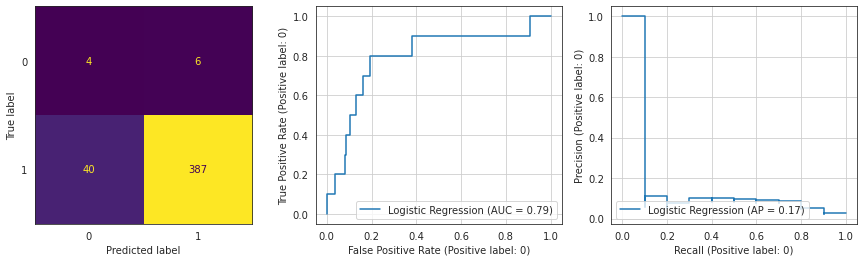

In [160]:
# Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500)
params_logreg = {
    'model__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'model__C' : [100, 10, 1.0, 0.1]

}
evaluate_model("Logistic Regression", logreg, params_logreg)

{'model__alpha': 0.4}
--------------------------------------------------------------------------------
Ridge Classifier:
Average f1-Score for Training Data:	 0.503

Precision Score for Test Data:		 0.07
Recall Score for Test Data:		 0.50
Macro Average f1-score on Test Data:	 0.523
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.07      0.50      0.13        10
           1       0.99      0.85      0.92       427

    accuracy                           0.85       437
   macro avg       0.53      0.68      0.52       437
weighted avg       0.97      0.85      0.90       437

-------------------------------------------------------


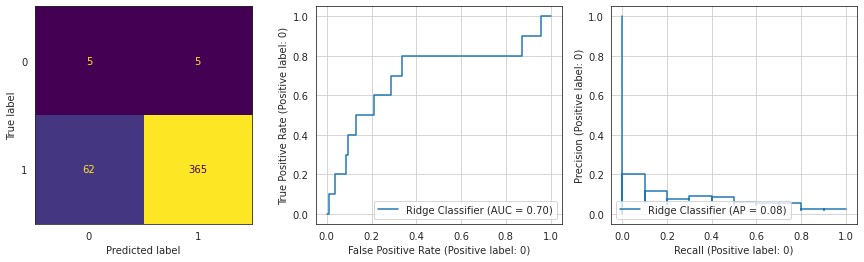

In [161]:
# Ridge Classifier model
ridge = RidgeClassifier(random_state=42)
params_ridge = {
    'model__alpha' : np.arange(0.1, 1.1, 0.1)
}
evaluate_model("Ridge Classifier", ridge, params_ridge)

{'model__n_estimators': 1000}
--------------------------------------------------------------------------------
Bagging Classifier:
Average f1-Score for Training Data:	 0.536

Precision Score for Test Data:		 0.12
Recall Score for Test Data:		 0.20
Macro Average f1-score on Test Data:	 0.560
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.12      0.20      0.15        10
           1       0.98      0.96      0.97       427

    accuracy                           0.95       437
   macro avg       0.55      0.58      0.56       437
weighted avg       0.96      0.95      0.95       437

-------------------------------------------------------


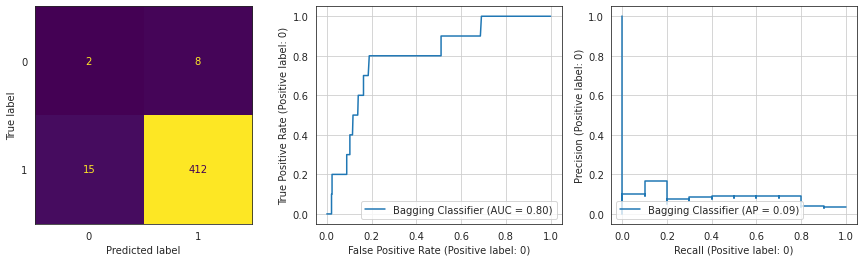

In [162]:
# Bagging Classifier model
bagging = BaggingClassifier(random_state=42)
params_bagging = {
    'model__n_estimators' : [10, 100, 1000]
}
evaluate_model("Bagging Classifier", bagging, params_bagging)

{'model__eval_metric': 'logloss'}
--------------------------------------------------------------------------------
XGBoost:
Average f1-Score for Training Data:	 0.550

Precision Score for Test Data:		 0.18
Recall Score for Test Data:		 0.40
Macro Average f1-score on Test Data:	 0.611
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.18      0.40      0.25        10
           1       0.99      0.96      0.97       427

    accuracy                           0.95       437
   macro avg       0.58      0.68      0.61       437
weighted avg       0.97      0.95      0.95       437

-------------------------------------------------------


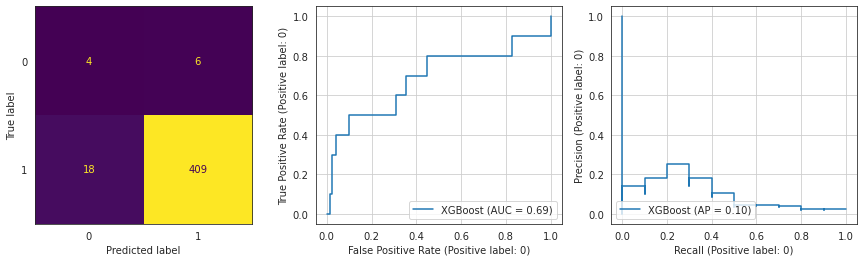

In [163]:
# XGBoost model
xgboost = XGBClassifier(use_label_encoder=False, random_state=42)
params_xgboost = {
    'model__eval_metric' : ['logloss', 'error']
}
evaluate_model("XGBoost", xgboost, params_xgboost)

<a id="model_evaluation"></a>
## 10. Model Evaluation

Now let's look at the overall performance of our models and compare them with each other.

In [179]:
# Model with best macro f1 score
max(model_scores, key=lambda k: (model_scores[k][2]))

'XGBoost'

In [180]:
# View all model scores
models_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Precision', 'Recall', 'Macro_f1'])
models_df.style.\
    highlight_max(axis=0, color='#b3ff66').\
    format("{:.3}")

,Precision,Recall,Macro_f1
SVC,0.14,0.1,0.55
Naive Bayes,0.1,0.5,0.555
Decision Tree,0.1,0.3,0.555
Random Forest,0.19,0.3,0.604
Logistic Regression,0.09,0.4,0.546
Ridge Classifier,0.07,0.5,0.523
Bagging Classifier,0.12,0.2,0.56
XGBoost,0.18,0.4,0.611


While XGBoost does not have the best precision or recall, it has a higher macro f1 score. Picking a best model here could depend on what is more important. If precision was more important, then the Random Forest model would be the best choice. Alternatively, if recall was most important, Naive bayes would be a better choice. XGBoost maintains reasonable scores for both precision and recall and thus is more balanced. We will use that as our best model in this case.

Note though that all of these models perform poorly and thus we would have to approach any predictions from these models with caution.

In [181]:
# Extract best model from pipeline
xgb_best = max(all_models, key=lambda x: x[1])[0]

In [182]:
# Pickle best model
import pickle

with open(f'saved_models/london_free_transport_classifier.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

In [183]:
# Use the 'don't know' set to test out the model

# Separate target variable
X_dk = df_dk.drop(df_dk.columns[7], axis=1)

# Perform One Hot Encoding
X_dk = enc.transform(X_dk)

# Make predictions
preds_dk = xgb_best.predict(X_dk)

In [189]:
# Add predictions to dataframe
df_dk = df_dk.copy()
df_dk.insert(8, 'Prediction', pd.Series(preds_dk, index=df_dk.index))
decision = {0 : 'Approve', 1 : 'Disapprove'}
df_dk['Prediction'] = df_dk['Prediction'].map(decision)
df_dk.head(15)

ValueError: cannot insert Prediction, already exists

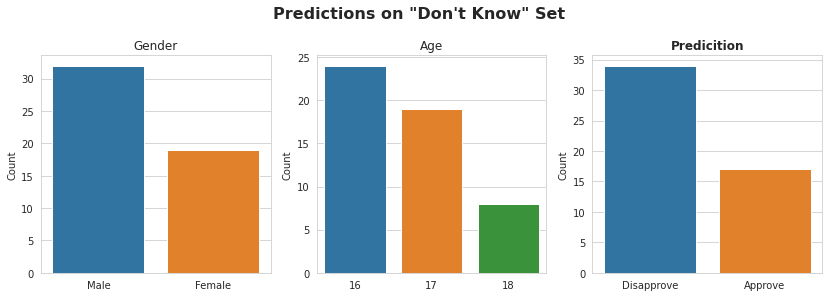

In [204]:
# Set up figure
fig, ax = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle("Predictions on \"Don't Know\" Set", weight='bold', fontsize=16, y=1.05)

# Plots 
sns.barplot(x=df_dk.iloc[:, 0].value_counts().index, y=df_dk.iloc[:, 0].value_counts(), ax=ax[0]) 
sns.barplot(x=df_dk.iloc[:, 1].value_counts().index, y=df_dk.iloc[:, 1].value_counts(), ax=ax[1])
sns.barplot(x=df_dk['Prediction'].value_counts().index, y=df_dk['Prediction'].value_counts(), ax=ax[2])

ax[0].set_title('Gender')
ax[1].set_title('Age')
ax[2].set_title('Predicition', weight='bold')

for x in range(3):
    ax[x].set_ylabel('Count');

As we can see, our model predicted that people who answered "Don't know" when asked whether they approve or disapprove of the decision to end free travel, were twice as likely to disapprove of the decision. Age seems to follow a similar distributuon to the orginal data. Interestingly, although our model predicted mostly disapprove, it also predicted quite a few approves. This could be due to the fact that there were a higher number of males in this set of data, which is congruent with our finding earlier - namely that males tend to approve of the decision more than females.

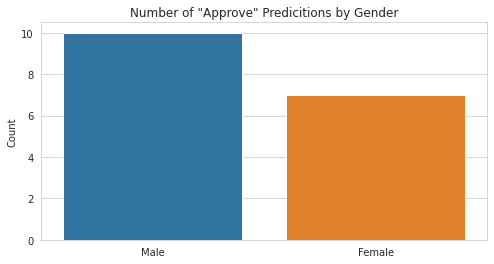

In [222]:
# Plot prediction to approve by gender
gender_preds = df_dk[df_dk.iloc[:, 8] == 'Approve'].iloc[:, 0].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=gender_preds.index, y=gender_preds)
plt.title('Number of \"Approve\" Predicitions by Gender')
plt.ylabel('Count');

Here we can quickly see that this was the case.

<a id="conclusion"></a>
## 11. Conclusion
---

<a id="future_recommendations"></a>
## 12. Future Recommendations
---

In [ ]:
# More Data
# More complex models
# Perform NLP on textual data to see if it aids in classification

**[Back to Top](#top)**